In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Stars.csv")
data

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


# Looking For Null Values

In [3]:
data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

# No Null Values in the dataset

# Data Preprocessing

In [4]:
# Label Encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
le = LabelEncoder()
data["Color"] = le.fit_transform(data["Color"])
data["Spectral_Class"] = le.fit_transform(data["Spectral_Class"])

In [6]:
x = data.drop("Type",axis = 1)
y = data["Type"]

In [7]:
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)

# Looking for Outliers

<AxesSubplot:xlabel='Temperature'>

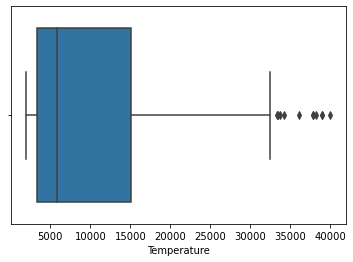

In [8]:
# BoxPlots are good for looking for Outliers
sns.boxplot(data["Temperature"])

<AxesSubplot:xlabel='Color'>

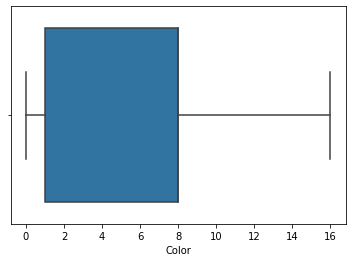

In [9]:
sns.boxplot(data["Color"]) # No Outliers

<AxesSubplot:xlabel='L'>

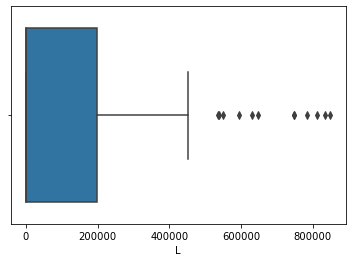

In [10]:
sns.boxplot(data["L"])

<AxesSubplot:xlabel='R'>

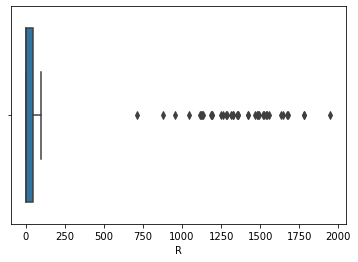

In [11]:
sns.boxplot(data["R"])

<AxesSubplot:xlabel='A_M'>

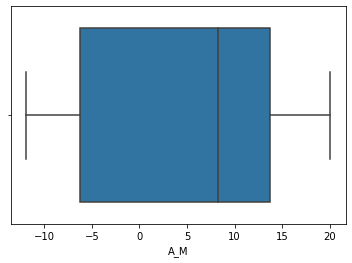

In [12]:
sns.boxplot(data["A_M"]) # No Outliers

<AxesSubplot:xlabel='A_M'>

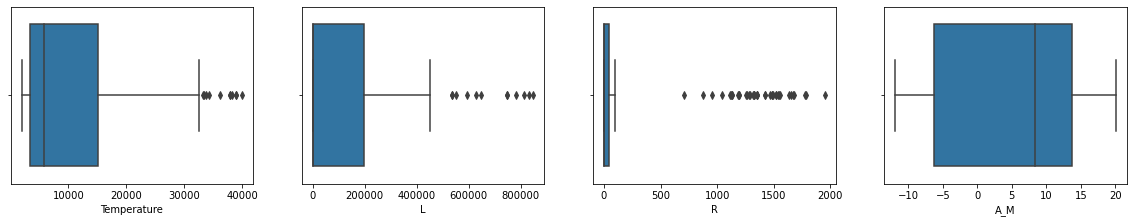

In [13]:
plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(data["Temperature"])

plt.subplot(4,4,2)
sns.boxplot(data["L"])

plt.subplot(4,4,3)
sns.boxplot(data["R"])

plt.subplot(4,4,4)
sns.boxplot(data["A_M"])

# We have Outliers in Temperature, L, R, So we have to reduce the outliers in those columns

In [14]:
data["Temperature"] = data["Temperature"].clip(lower = data["Temperature"].quantile(0.05), upper = data["Temperature"].quantile(0.95))
data["L"] = data["L"].clip(lower = data["L"].quantile(0.05), upper = data["L"].quantile(0.95))
data["R"] = data["R"].clip(lower = data["R"].quantile(0.05), upper = data["R"].quantile(0.95))

<AxesSubplot:xlabel='A_M'>

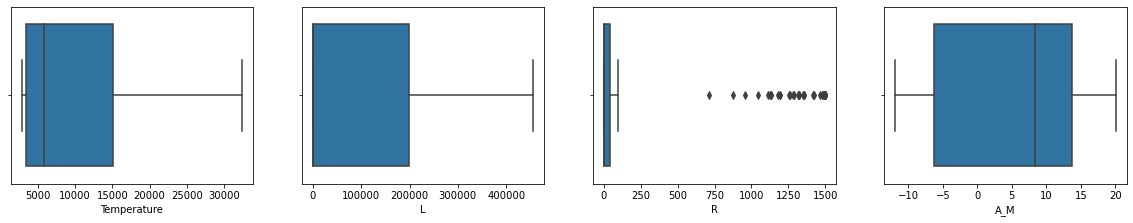

In [15]:
plt.figure(figsize = (20,15))
plt.subplot(4,4,1)
sns.boxplot(data["Temperature"])

plt.subplot(4,4,2)
sns.boxplot(data["L"])

plt.subplot(4,4,3)
sns.boxplot(data["R"])

plt.subplot(4,4,4)
sns.boxplot(data["A_M"])

# We Reduced some of the Outliers, Now it's time to build the Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [17]:
etc = ExtraTreesClassifier()
features = etc.fit(x,y)

In [18]:
columns = x.columns
columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class'], dtype='object')

In [19]:
feature_importance = pd.DataFrame({"Features":columns,"importance":features.feature_importances_})
feature_importance

,Features,importance
0,Temperature,0.071224
1,L,0.087395
2,R,0.251128
3,A_M,0.361686
4,Color,0.099360
5,Spectral_Class,0.129207


In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.7,random_state = 42)

# LogisticRegression

In [25]:
lg = LogisticRegression()
model = lg.fit(x_train,y_train)

In [26]:
y_pred = model.predict(x_test)
y_pred

array([2, 0, 3, 4, 4, 5, 5, 2, 0, 2, 4, 2, 5, 4, 5, 5, 0, 1, 3, 0, 0, 1,
       5, 3, 5, 3, 1, 2, 5, 3, 1, 4, 2, 0, 1, 0, 1, 5, 1, 5, 4, 5, 4, 1,
       3, 0, 4, 3, 1, 0, 2, 0, 2, 1, 4, 2, 5, 3, 1, 1, 3, 0, 0, 0, 4, 0,
       4, 2, 5, 1, 5, 5], dtype=int64)

In [29]:
accuracy_lg = metrics.accuracy_score(y_test,y_pred)
accuracy_lg

0.9861111111111112

# Actually we got Pretty Good Accuracy with LogisticRegression

# KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier()
model_knn = knn.fit(x_train,y_train)

In [35]:
y_pred_knn = model_knn.predict(x_test)

In [36]:
accuracy_knn = metrics.accuracy_score(y_test,y_pred_knn)
accuracy_knn

0.9583333333333334

# with KNN too accuracy is Good

# GradientBoosting Classifier

In [33]:
gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(x_train,y_train)

In [37]:
y_pred_gbc = model_gbc.predict(x_test)

In [38]:
accuracy_gbc = metrics.accuracy_score(y_test,y_pred_gbc)
accuracy_gbc

1.0

# Gradient Boosting.. Cheers! we got 100% 

In [40]:
rfc = RandomForestClassifier()
model_rfc = rfc.fit(x_train,y_train)

In [41]:
y_pred_rfc = model_rfc.predict(x_test)

In [42]:
accuracy_rfc = metrics.accuracy_score(y_test,y_pred_rfc)
accuracy_rfc

1.0

# Gradient Boosting Make a Way to RandomForest too.. 